In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as sp

NOTES 

check significance of reaction time with similarity from SPP 

check significance of wordnet synonym synset path sim with SPP similarity 

PATH SIM 

path similarity is best metric for comparising in wordnet since the implementation for path sim is taking shortest path that connects 

if 2 words are synonyms, path sim = 1

if 2 words are unrelated - path sim = 0

For example, dog and canine have a path similarity of 1, because they are synonyms and belong to the same synset. Dog and cat have a path similarity of 0.2, because they are connected by four edges in the WordNet hierarchy. Dog and book have a path similarity of 0.0714, because they are connected by 13 edges in the WordNet hierarchy

In [13]:
wordnet_sim = pd.read_csv('NT_trials_all_sims_with_NaNs.csv')
# wordnet_sim = pd.read_csv('NT_trials_all_sims_with_NaNs_ps_wsd.csv')
raw_data = pd.read_excel('all naming subjects.xlsx')

In [14]:
# preprocess raw_data to get data_isi
data_isi = raw_data[['Session', 'isi', 'prime', 'target', 'target.RT',
       'target.ACC']].dropna()

data_isi['prime'] = [word.lower() for word in data_isi['prime']]

data_isi = data_isi.rename(columns={'target.RT': 'RT', 'target.ACC': 'accuracy'})

# merge data to get isi and session
data = pd.merge(wordnet_sim, data_isi, how='inner', on=['prime','target', 'RT', 'accuracy'])
data = data.drop_duplicates(subset=['prime','target','RT','accuracy','Session'])

# split data into 50ms lag and 1050ms lag
isi_data = data.groupby(['isi'])
isi50 = isi_data.get_group(50)
isi1050 = isi_data.get_group(1050)


# find different path sim values
pathsim_50_0 = isi50[isi50['Path Similarity'] == 0]
pathsim_50_1 = isi50[isi50['Path Similarity'] == 1]

pathsim_1050_0 = isi1050[isi1050['Path Similarity'] == 0]
pathsim_1050_1 = isi1050[isi1050['Path Similarity'] == 1]

In [5]:
# only need 0 and 1 sim 

# sim_ratings = data['Path Similarity'].unique()
# sim_ratings.sort()

# t_isi50 = []
# t_isi1050 = []

# for rating in sim_ratings:
#     t_isi50.append(sp.ttest_ind(isi50[isi50['Path Similarity'] == rating]['RT'], isi50[isi50['Path Similarity'] == 1]['RT'])[1])
#     t_isi1050.append(sp.ttest_ind(isi1050[isi1050['Path Similarity'] == rating]['RT'], isi1050[isi1050['Path Similarity'] == 1]['RT'])[1])

In [6]:
sp.ttest_ind(pathsim_50_0['RT'], pathsim_50_1['RT'])

Ttest_indResult(statistic=0.8237842188645873, pvalue=0.41009528876236856)

In [7]:
sp.ttest_ind(pathsim_1050_0['RT'], pathsim_1050_1['RT'])

Ttest_indResult(statistic=2.4744334706836804, pvalue=0.01337405351535823)

In [8]:
pathsim_50_0['RT'].describe()

count    3929.000000
mean      550.130059
std       187.498857
min         6.000000
25%       458.000000
50%       523.000000
75%       604.000000
max      2861.000000
Name: RT, dtype: float64

In [9]:
pathsim_50_1['RT'].describe()

count    2006.000000
mean      545.932702
std       182.055487
min         9.000000
25%       458.000000
50%       522.000000
75%       604.000000
max      2612.000000
Name: RT, dtype: float64

In [10]:
pathsim_1050_0['RT'].describe()

count    3674.000000
mean      549.829341
std       231.001376
min         2.000000
25%       442.000000
50%       507.000000
75%       601.000000
max      2979.000000
Name: RT, dtype: float64

In [11]:
pathsim_1050_1['RT'].describe()

count    1951.000000
mean      534.786263
std       187.877025
min         3.000000
25%       440.000000
50%       500.000000
75%       582.000000
max      2542.000000
Name: RT, dtype: float64

REACTION TIME

with lag of 1050ms, we see that path sim of 0 is significantly different than path sim of 1 with pathsim = 1having a lower mean than pathsim = 0

for lag of 50ms, there is not significant different. an explanation could be that 50ms is not enough for participants to be primed by the prime word

In [12]:
sp.ttest_ind(pathsim_50_0['accuracy'], pathsim_50_1['accuracy'])

Ttest_indResult(statistic=-1.1496517907897346, pvalue=0.2503336576989869)

In [13]:
sp.ttest_ind(pathsim_1050_0['accuracy'], pathsim_1050_1['accuracy'])

Ttest_indResult(statistic=-0.4005267620476077, pvalue=0.6887837926486965)

In [14]:
# pathsim_50_0['accuracy'].describe()
# pathsim_50_1['accuracy'].describe()
# pathsim_1050_0['accuracy'].describe()
# pathsim_1050_1['accuracy'].describe()

ACCURACY

with lag of 50ms, a pvalue of 0.25 indicates there is not a significant difference in accuracy between path sim 0 and 1. a possible explanation for this is that there is not enough time for the word to prime properly for participants

with a lag of 1050ms, a pvalue of 0.7 indicates there is an even less significant difference in accuracy between path sim 0 and 1. a possible explanation is that when there is enough time, participants will take longer to respond as shown by the reaction time analysis but will accurately respond given enough time to prime. as can be seen, both path sim 0 and 1 have 99% accuracy

In [15]:
def uni_wordpair(data):
    target_uni = data['target'].unique()

    avg_data = pd.DataFrame(columns = ['target','prime','RT', 'RT_std','acc', 'acc_std','path sim']) 


    for target in target_uni:
        
        subset_upper = data[data['target'] == target]

        prime_uni = subset_upper['prime'].unique()

        for prime in prime_uni:

            subset_lower = subset_upper[subset_upper['prime'] == prime]

            row = {'target': [target],'prime': [prime],\
                'RT': [subset_lower['RT'].mean()], \
                    'RT_std': [subset_lower['RT'].std()], 'acc': [subset_lower['accuracy'].mean()], 'acc_std': [subset_lower['accuracy'].std()], \
                        'path sim': [subset_lower['Path Similarity'].iloc[0]]}

            row_df = pd.DataFrame(row)
            avg_data = pd.concat([avg_data, row_df], axis=0, ignore_index=True)

    return avg_data

In [16]:
wordpair_50 = uni_wordpair(isi50)
wordpair_1050 = uni_wordpair(isi1050)

In [17]:
# path_sim_uni = avg_data['path sim'].unique()

# for psu in path_sim_uni:
#     avg_data[avg_data['path sim'] == psu].describe().to_csv('path_sim describe ' + str(psu) + '.csv')

# pd.read_csv('tables/path_sim describe 1.0.csv')


In [18]:
wordpair_50

,target,prime,RT,RT_std,acc,acc_std,path sim
0,chance,last,541.340426,142.891914,1.000000,0.000000,0.100000
1,chance,armor,474.041667,126.839673,1.000000,0.000000,0.071429
2,chance,nuclear,543.714286,193.240555,1.000000,0.000000,0.111111
3,chance,opportunity,495.743590,108.501933,0.974359,0.160128,1.000000
4,cats,spinach,518.295455,93.790856,1.000000,0.000000,0.071429
...,...,...,...,...,...,...,...
6686,lightning,excellent,571.058824,136.097148,0.941176,0.242536,0.090909
6687,lightning,thunder,574.333333,86.793241,1.000000,0.000000,0.125000
6688,FALSE,phony,719.066667,592.114066,0.866667,0.351866,0.090909
6689,FALSE,untrue,576.666667,115.588350,0.833333,0.408248,0.333333


In [19]:
def get_sim(avg_data, isi):
    sim_uni = avg_data['path sim'].unique()
    sim_uni.sort()

    rt = []
    rt_std = []
    acc = []
    acc_std = []

    for s in sim_uni:
        sim_data = avg_data[avg_data['path sim'] == s]

        rt.append(sim_data['RT'].mean())
        rt_std.append(sim_data['RT_std'].mean())
        acc.append(sim_data['acc'].mean())
        acc_std.append(sim_data['acc_std'].mean())
    return [rt, rt_std, acc, acc_std, sim_uni, 'path sim' + isi]


In [20]:
path_50 = get_sim(wordpair_50, '50')
path_1050 = get_sim(wordpair_1050, '1050')
# wu = get_sim('wu palmer')
# leacock = get_sim('leacock-chodorow')
# res = get_sim('resnik')
# jiang = get_sim('jiang-conrath')
# lin = get_sim('lin')

# sim = [path, wu, leacock, res, jiang, lin]


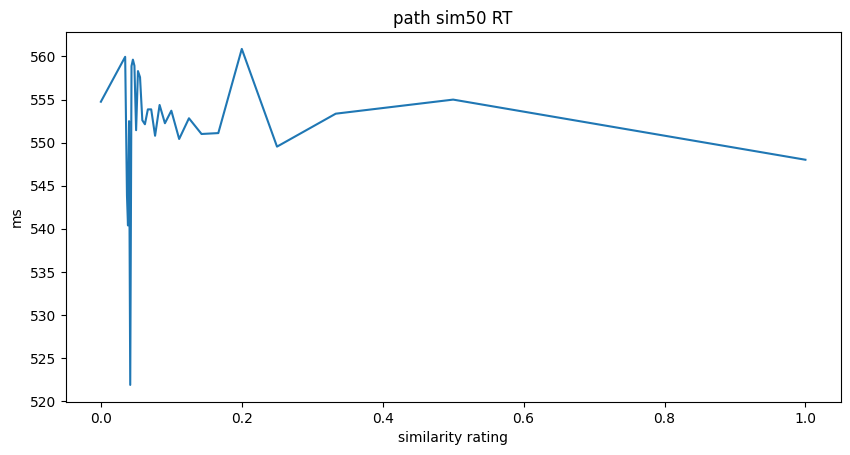

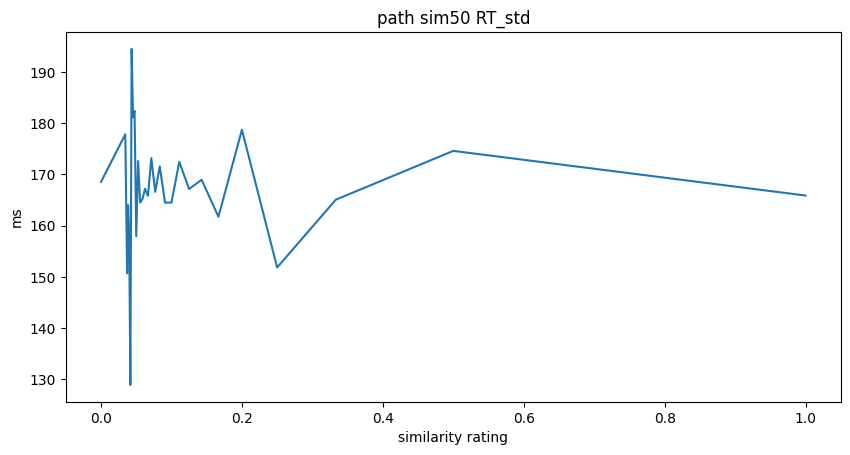

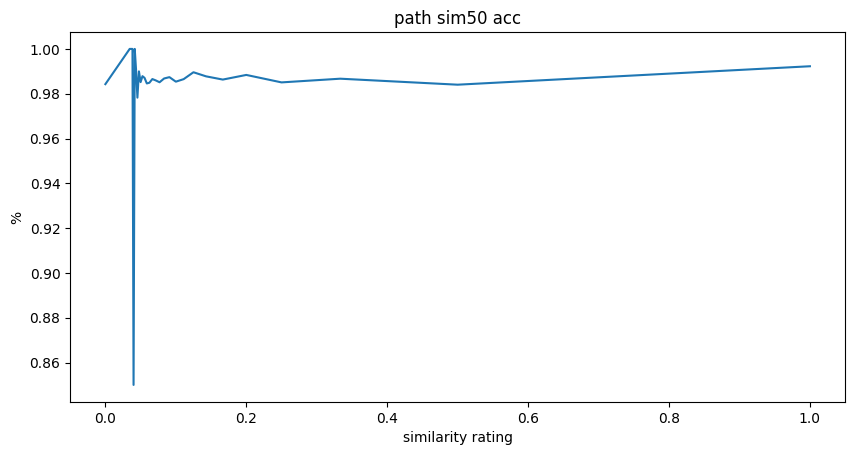

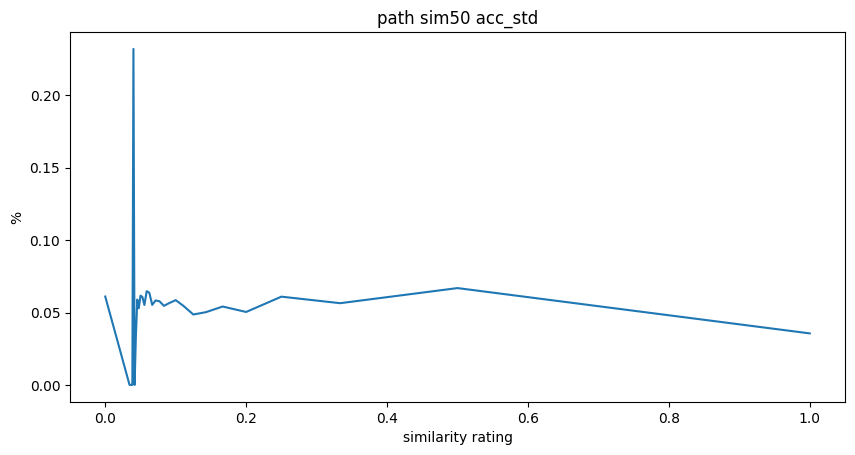

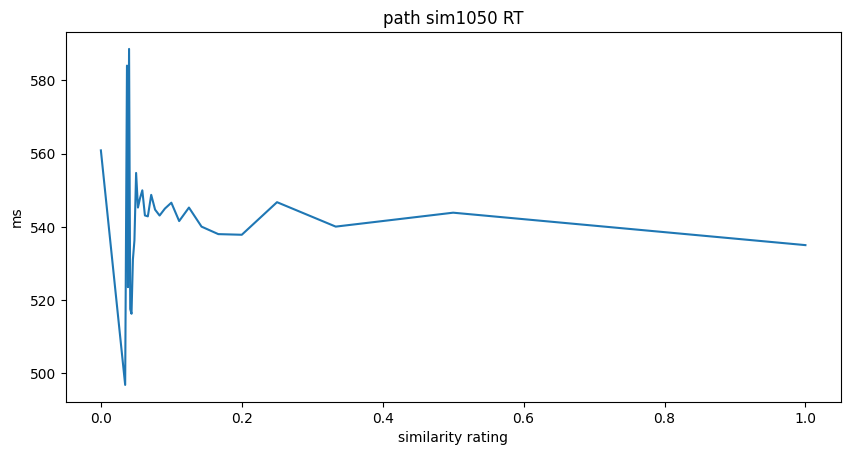

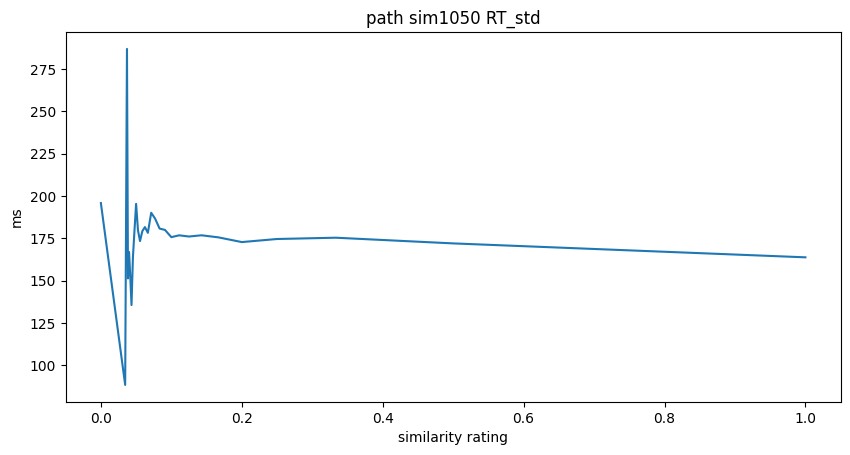

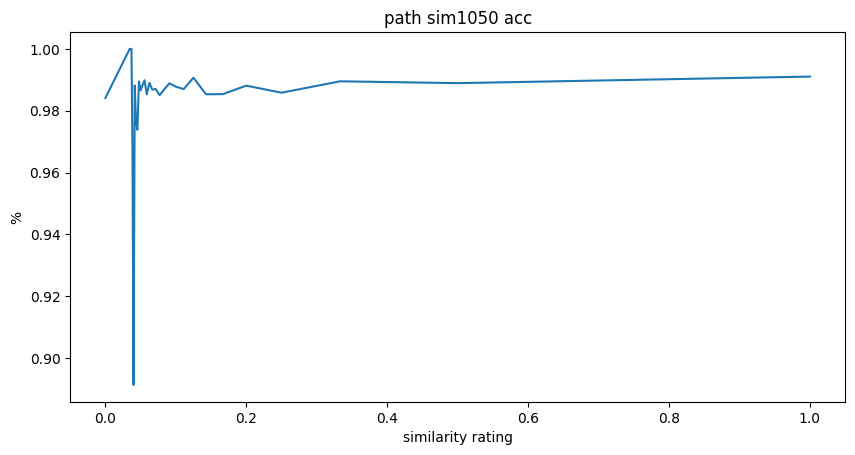

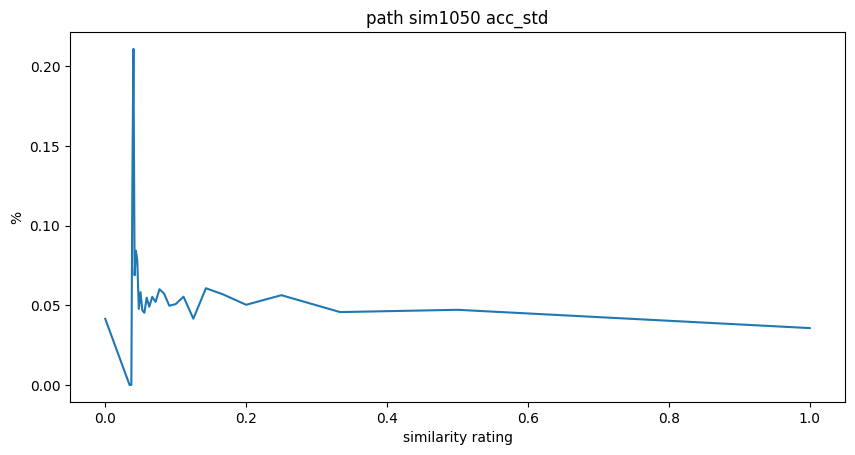

In [21]:
types = ['RT','RT_std','acc','acc_std']
axis = ['ms','ms','%','%']


for i in range(4):
    plt.figure().set_figwidth(10)
    plt.plot(path_50[4], path_50[i])
    plt.title(path_50[5] + ' ' + types[i])
    plt.xlabel('similarity rating')
    plt.ylabel(axis[i])
    plt.show()
    # plt.savefig(s[5] + ' ' + types[i] + '.png')

for i in range(4):
    plt.figure().set_figwidth(10)
    plt.plot(path_1050[4], path_1050[i])
    plt.title(path_1050[5] + ' ' + types[i])
    plt.xlabel('similarity rating')
    plt.ylabel(axis[i])
    plt.show()
    # plt.savefig(s[5] + ' ' + types[i] + '.png')